# OLS Library Exploratory Data Analysis Notebook

**Authorship:**
Adam Klie, *07/24/2021*
***
**Description:**
Notebook to perform an initial exploratory data analysis
***
**TODOs:**
 - <font color='green'> Done TODO </font>
 - <font color='orange'> WIP TODO </font>
 - <font color='red'> Possibly make feature preprocessing its own notebook </font>
***

# Set-up

In [1]:
# Classics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Helpful libraries
import tqdm

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [25]:
ACTIVE_LOW = 0.18
ACTIVE_HIGH = 0.40

# Load dataset
**Note**: There are two versions of the dataset I have to work with. See shared Google Drive for version history. The data has the following descriptors:
1. **NAME** - Site list 
2. **SEQUENCE** - Sequence
3. **MPRA_FXN** - Functional by MPRA (see slide 2)
    - Activity >.4 = functional (1)
    - Activity <.18 = non-functional (0)
    - If activity is in between => ‘na’
4. **MICROSCPOPE_FXN** - Microscope functional group
    - Only be for experiments with low variance and good controls (lacking *)
5. **ACTIVITY_SUMRNA_NUMDNA**
    - Activity score => sum MRPM all RNA barcodes / number DNA barcodes

In [83]:
# Load from tsv provided by Joe
OLS_data = pd.read_csv(
    "20210728-3.EnhancerTable.ForAdam.FunctionalEnhancers.WT-detected.ABL-notDetected.10R-20U-0.1P.tsv",
    sep="\t",
    na_values="na",
)
OLS_data.head()

,NAME,SEQUENCE,MPRA_FXN,MICROSCOPE_FXN,ACTIVITY_SUMRNA_NUMDNA
0,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,1.0,Neural Enhancer,0.611767
1,S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATT...,NaN,NaN,0.313011
2,S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,NaN,NaN,0.387121
3,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.0,NaN,0.000000
4,S1-G1R-S2-E1R-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATT...,NaN,NaN,0.250995


In [109]:
OLS_data["label"] = np.nan
OLS_data.loc[OLS_data["ACTIVITY_SUMRNA_NUMDNA"] <= ACTIVE_LOW, "label"] = 0
OLS_data.loc[OLS_data["ACTIVITY_SUMRNA_NUMDNA"] >= ACTIVE_HIGH, "label"] = 1

In [92]:
# Define a set black features for current lack of a better term
block_features = [
    "linker_1",
    "TFBS_1",
    "linker_2",
    "TFBS_2",
    "linker_3",
    "TFBS_3",
    "linker_4",
    "TFBS_4",
    "linker_5",
    "TFBS_5",
    "linker_6",
]

In [110]:
# Add these as columns to the dataframe
OLS_data[block_features] = OLS_data["NAME"].str.split("-").to_list()
OLS_data.head()

,NAME,SEQUENCE,MPRA_FXN,MICROSCOPE_FXN,ACTIVITY_SUMRNA_NUMDNA,label,linker_1,TFBS_1,linker_2,TFBS_2,linker_3,TFBS_3,linker_4,TFBS_4,linker_5,TFBS_5,linker_6
0,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,1.0,Neural Enhancer,0.611767,1.0,S1,G1R,S2,E1F,S3,E2F,S4,G2R,S5,G3F,S6
1,S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGAGATAACTAACGGAAGTTTTCGAAAAGGAAATT...,NaN,NaN,0.313011,NaN,S1,G1F,S2,E1F,S3,E2F,S4,G2R,S5,G3F,S6
2,S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,NaN,NaN,0.387121,NaN,S1,G1R,S2,E1F,S3,E2F,S4,G2F,S5,G3F,S6
3,S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,0.0,NaN,0.000000,0.0,S1,G1R,S2,E1F,S3,E2F,S4,G2R,S5,G3R,S6
4,S1-G1R-S2-E1R-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACTTCCGTTTTCGAAAAGGAAATT...,NaN,NaN,0.250995,NaN,S1,G1R,S2,E1R,S3,E2F,S4,G2R,S5,G3F,S6


In [125]:
OLS_data["MPRA_FXN"].value_counts(dropna=False), OLS_data["label"].value_counts(dropna=False)

(0.0    208729
 NaN    157864
 1.0     94207
 Name: MPRA_FXN, dtype: int64,
 0.0    208729
 NaN    157864
 1.0     94207
 Name: label, dtype: int64)

# Exploratory data analysis (EDA)

## Provided data

### **Q1** How many total enhancers are captured?

In [126]:
len(OLS_data)

460800

### **Q2**: How many functional enhancers are there?

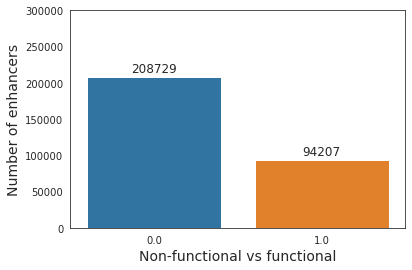

In [127]:
sns.set_style("white")
g = sns.countplot(data=OLS_data, x="MPRA_FXN")

for bar in g.patches:
    g.annotate(
        format(bar.get_height(), "d"),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        size=12,
    )

plt.ylim((0, 300000))
plt.xlabel("Non-functional vs functional", size=14)
plt.ylabel("Number of enhancers", size=14)
plt.savefig("figs/0.18-0.4_class-balance.png")

### **Q3** What are the different spacings and orientations that I have?

*Total enhancers profiled*

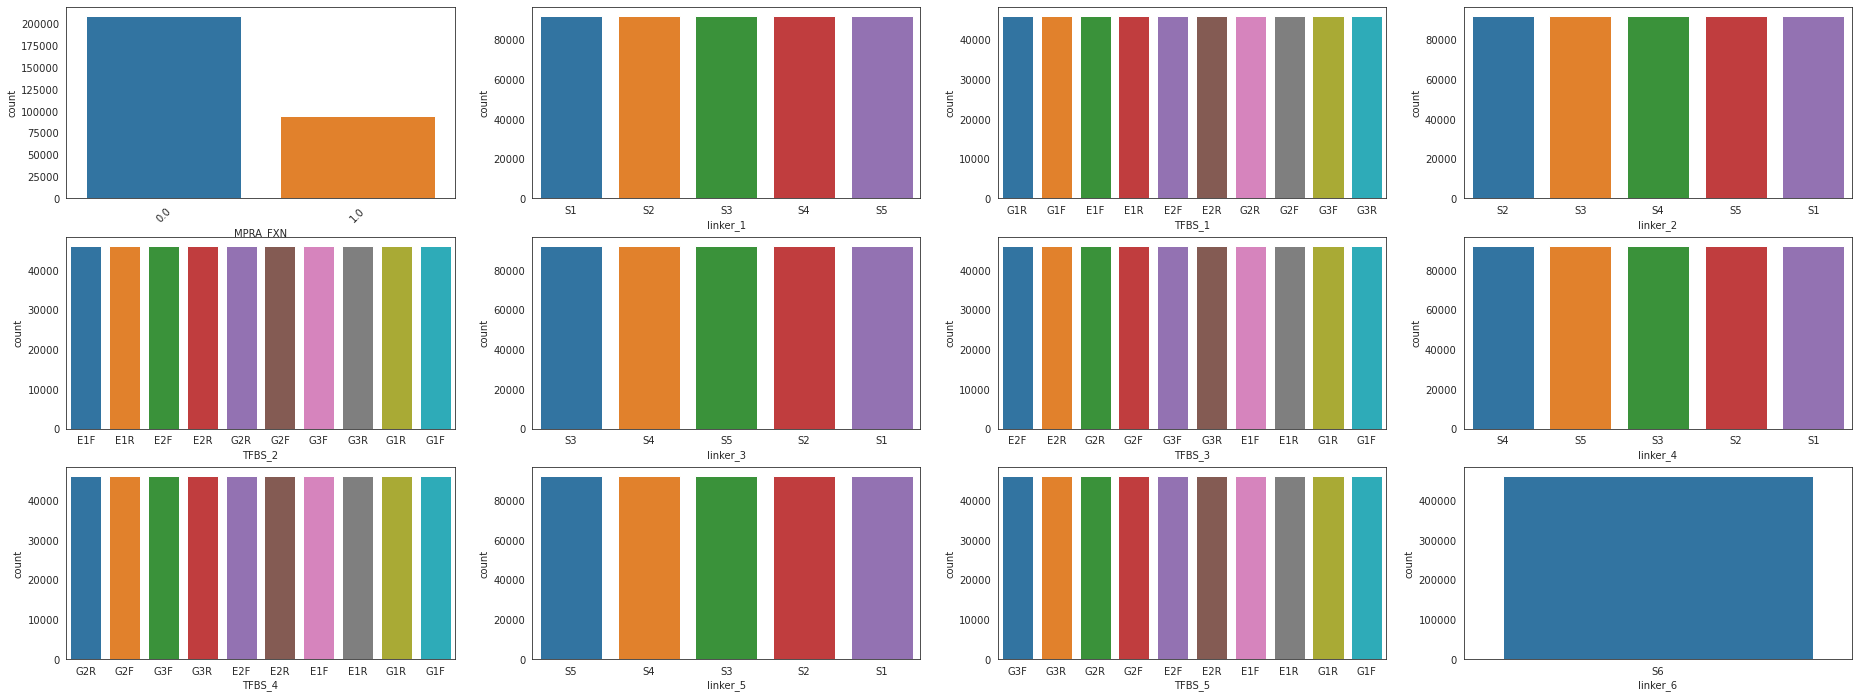

In [128]:
# Plot the number of each feature in each block as countplots with seaborn
num_rows, num_cols = 3, 4
fig, ax = plt.subplots(3, 4, figsize=(32, 12))
index = 0
for col in ["MPRA_FXN"] + block_features:
    row_num = int(index / num_cols)
    col_num = index % num_cols
    sns.countplot(data=OLS_data, x=col, ax=ax[row_num][col_num])
    if index == 0:
        ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=45)
    index += 1

*Joe's high confidence enhancers (Acitivity outside the range (0.18-0.40)*

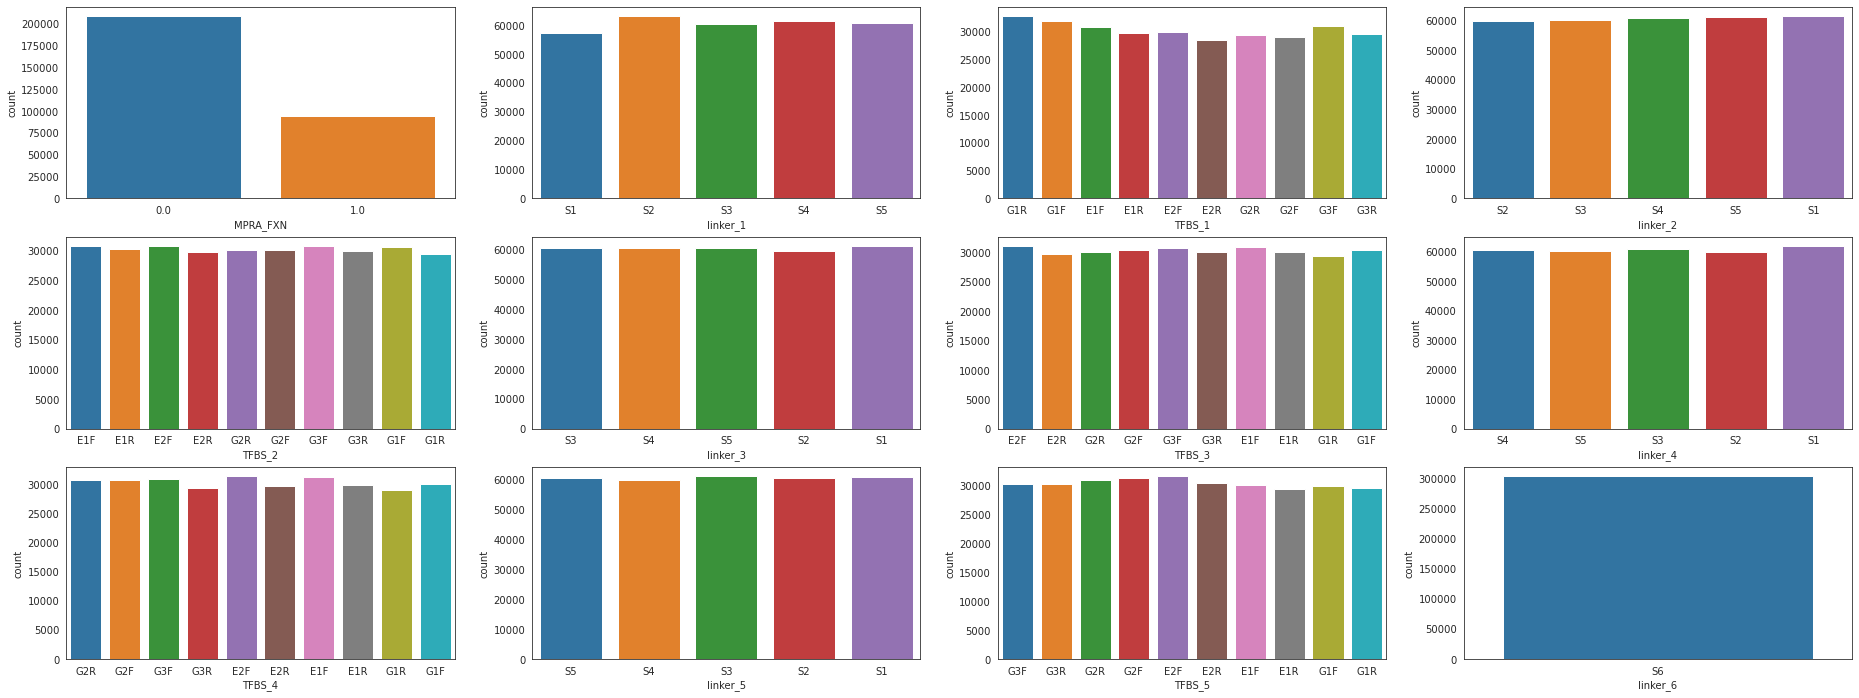

In [47]:
# Plot the number of each feature in each block as countplots with seaborn
num_rows, num_cols = 3, 4
fig, ax = plt.subplots(3, 4, figsize=(32, 12))
index = 0
for col in ["MPRA_FXN"] + block_features:
    row_num = int(index / num_cols)
    col_num = index % num_cols
    sns.countplot(
        data=OLS_data[~OLS_data["MPRA_FXN"].isna()], x=col, ax=ax[row_num][col_num]
    )
    index += 1

*My own set threshold for high confidence enhancers (see Set-up section)*

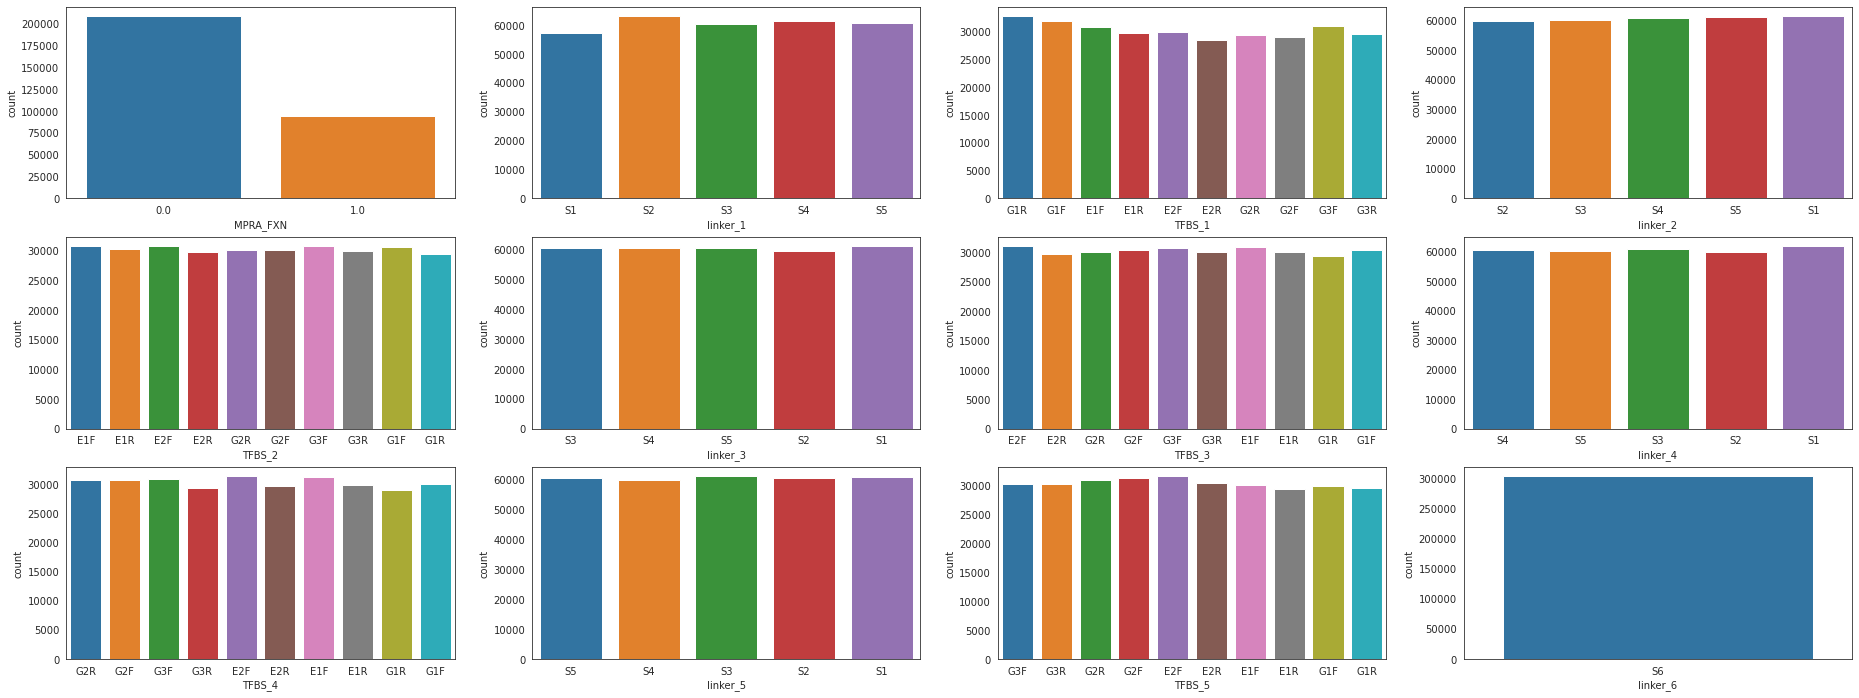

In [130]:
# Plot the number of each feature in each block as countplots with seaborn
num_rows, num_cols = 3, 4
fig, ax = plt.subplots(3, 4, figsize=(32, 12))
index = 0
for col in ["MPRA_FXN"] + block_features:
    row_num = int(index / num_cols)
    col_num = index % num_cols
    sns.countplot(
        data=OLS_data[~OLS_data["label"].isna()], x=col, ax=ax[row_num][col_num]
    )
    index += 1

### **Q4** Are different features associated with functionality? <font color=red> Prelim analysis!!! </font>

In [131]:
if (((OLS_data["ACTIVITY_SUMRNA_NUMDNA"] <= ACTIVE_LOW) | (OLS_data["ACTIVITY_SUMRNA_NUMDNA"] >= ACTIVE_HIGH)) == (~OLS_data["MPRA_FXN"].isna())).all():
    print("Using Joe's filter of removing activities between {} and {}".format(ACTIVE_LOW, ACTIVE_HIGH))
    OLS_data = OLS_data[~OLS_data["MPRA_FXN"].isna()]
else:
    print("Using own filter of removing activities between {} and {}".format(ACTIVE_LOW, ACTIVE_HIGH))
    OLS_data = OLS_data[~OLS_data["label"].isna()]

Using Joe's filter of removing activities between 0.18 and 0.4


In [132]:
import statsmodels.api as sm

In [139]:
pos_iter = iter(OLS_data.columns[6:])

In [157]:
curr_pos = next(pos_iter)
curr_pos

'TFBS_1'

In [159]:
# Generate a contigency table for this position
cont_tbl = pd.crosstab(OLS_data["label"], OLS_data[curr_pos])
cont_tbl

TFBS_1,E1F,E1R,E2F,E2R,G1F,G1R,G2F,G2R,G3F,G3R
label,,,,,,,,,,
0.0,21740,21044,19884,18625,25453,24247,18953,17229,22507,19047
1.0,9111,8635,10128,9814,6531,8633,10115,12221,8435,10584


In [160]:
if (not (cont_tbl.sum(axis=1).values == OLS_data["label"].value_counts().values).all()) or (not(np.array(sorted(cont_tbl.sum(axis=0).values)) == np.array(sorted(OLS_data[curr_pos].value_counts().values))).all()):
    print("Something is rotten in the state of Denmark")

In [161]:
# Build a statsmodels "Table" object
table = sm.stats.Table(cont_tbl)

**<u> (Observed - Expected) frequencies under indpendence assumption </u>**

In [162]:
diff = table.table_orig - table.fittedvalues
diff

TFBS_1,E1F,E1R,E2F,E2R,G1F,G1R,G2F,G2R,G3F,G3R
label,,,,,,,,,,
0.0,483.040183,594.571768,-794.871933,-970.04328,3415.380384,1592.018354,-1075.436937,-3062.642624,1187.339352,-1369.355266
1.0,-483.040183,-594.571768,794.871933,970.04328,-3415.380384,-1592.018354,1075.436937,3062.642624,-1187.339352,1369.355266


**<u> Pearson residuals (Observed - Expected)/(Expected^1/2) under indpendence assumption. </u>** This attempts to adjust for larger values of observed and expected

In [163]:
# Calculate manually
resid_pearson = diff / (table.fittedvalues ** 0.5)
resid_pearson

TFBS_1,E1F,E1R,E2F,E2R,G1F,G1R,G2F,G2R,G3F,G3R
label,,,,,,,,,,
0.0,3.313086,4.157801,-5.527564,-6.929757,23.006828,10.577090,-7.599087,-21.499963,8.131763,-9.583564
1.0,-4.931539,-6.188901,8.227797,10.314966,-34.245739,-15.744034,11.311266,32.002767,-12.104156,14.265166


In [164]:
# Use statsmodels
table.resid_pearson

TFBS_1,E1F,E1R,E2F,E2R,G1F,G1R,G2F,G2R,G3F,G3R
label,,,,,,,,,,
0.0,3.313086,4.157801,-5.527564,-6.929757,23.006828,10.577090,-7.599087,-21.499963,8.131763,-9.583564
1.0,-4.931539,-6.188901,8.227797,10.314966,-34.245739,-15.744034,11.311266,32.002767,-12.104156,14.265166


In [165]:
# Note that this can be related to chi2 (http://people.musc.edu/~bandyopd/bmtry711.11/lecture_10.pdf)
(table.resid_pearson ** 2).values.sum()

4585.483528659057

**<u> Chi-2 test for independence</u>**

In [166]:
rslt = table.test_nominal_association()

In [167]:
rslt.statistic, rslt.pvalue

(4585.483528659057, 0.0)

In [168]:
# Double check with scipy
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(cont_tbl)
chi2, p

(4585.483528659057, 0.0)

**<u> Odds-ratios and plots </u>**

In [152]:
# from scipy.stats import fisher_exact
# fisher_exact(pd.concat([cont_tbl.iloc[:,0], cont_tbl.iloc[:,1:].sum(axis=1)], axis=1))

In [169]:
alpha = 0.05
odds_df = pd.DataFrame(
    columns=[
        "OR",
        "OR " + str(alpha * 100) + "%",
        "OR " + str((1 - alpha) * 100) + "%",
    ],
    index=cont_tbl.columns,
)
for col in cont_tbl.columns:
    tab = pd.concat([cont_tbl[col], cont_tbl.drop(col, axis=1).sum(axis=1)], axis=1)
    tab = tab.loc[[1, 0]]
    table = sm.stats.Table2x2(tab.values)
    if not (
        (
            table.table_orig.sum(axis=1)
            == OLS_data["label"].value_counts().loc[[1, 0]].values
        ).all()
    ):
        print("Something is rotten in the state of Denmark")
    odds_df.loc[col]["OR"] = table.oddsratio
    (
        odds_df.loc[col]["OR " + str(alpha * 100) + "%"],
        odds_df.loc[col]["OR " + str((1 - alpha) * 100) + "%"],
    ) = table.oddsratio_confint(0.05)

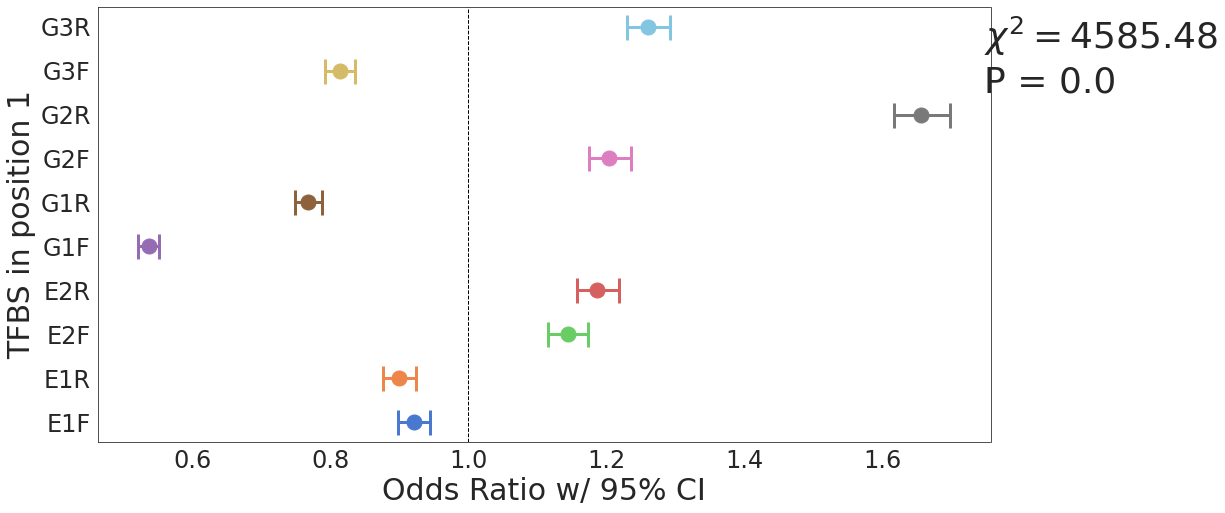

In [170]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(16, 8))
ax.axvline(1, ls="--", linewidth=1, color="black")
# odds_df = np.log(odds_df.astype(float))

n = 0
for index, i in odds_df.iterrows():
    x = [i["OR 5.0%"], i["OR 95.0%"]]
    y = [n, n]
    ax.plot(
        x,
        y,
        "|",
        markersize=25,
        markeredgewidth=3,
        linewidth=3,
        color=sns.color_palette("muted")[n],
    )
    ax.plot(
        x,
        y,
        "-",
        markersize=25,
        markeredgewidth=3,
        linewidth=3,
        color=sns.color_palette("muted")[n],
    )

    y = [n]
    x = [i["OR"]]
    ax.plot(x, y, "o", color=sns.color_palette("muted")[n], markersize=15)
    n += 1

ax.set_ylabel(
    "{0} in position {1}".format(curr_pos.split("_")[0], curr_pos.split("_")[1]),
    fontsize=30,
)
ax.set_yticks(range(0, n))
ax.set_yticklabels(odds_df.index, fontsize=24)

ax.set_xlabel("Odds Ratio w/ 95% CI", fontsize=30)
ax.tick_params(axis="x", labelsize=24)
ax.text(
    odds_df["OR 95.0%"].max() + 0.05,
    n - 1.5,
    r"$\chi^{2} =$" + str(round(chi2, 2)),
    fontsize=36,
)
ax.text(odds_df["OR 95.0%"].max() + 0.05, n - 2.5, "P = {}".format(p), fontsize=36)
plt.savefig("figs/odds_ratios/{}-{}_{}.png".format(ACTIVE_LOW, ACTIVE_HIGH, curr_pos))

## **Q5** What if you collapse on TF and orientation only? <font color=red> Prelim analysis!!! </font>

In [801]:
OLS_data_collapsed = OLS_data.replace(
    {
        "G1F": "GF",
        "G2F": "GF",
        "G3F": "GF",
        "G1R": "GR",
        "G2R": "GR",
        "G3R": "GR",
        "E1F": "EF",
        "E2F": "EF",
        "E1R": "ER",
        "E2R": "ER",
    }
)

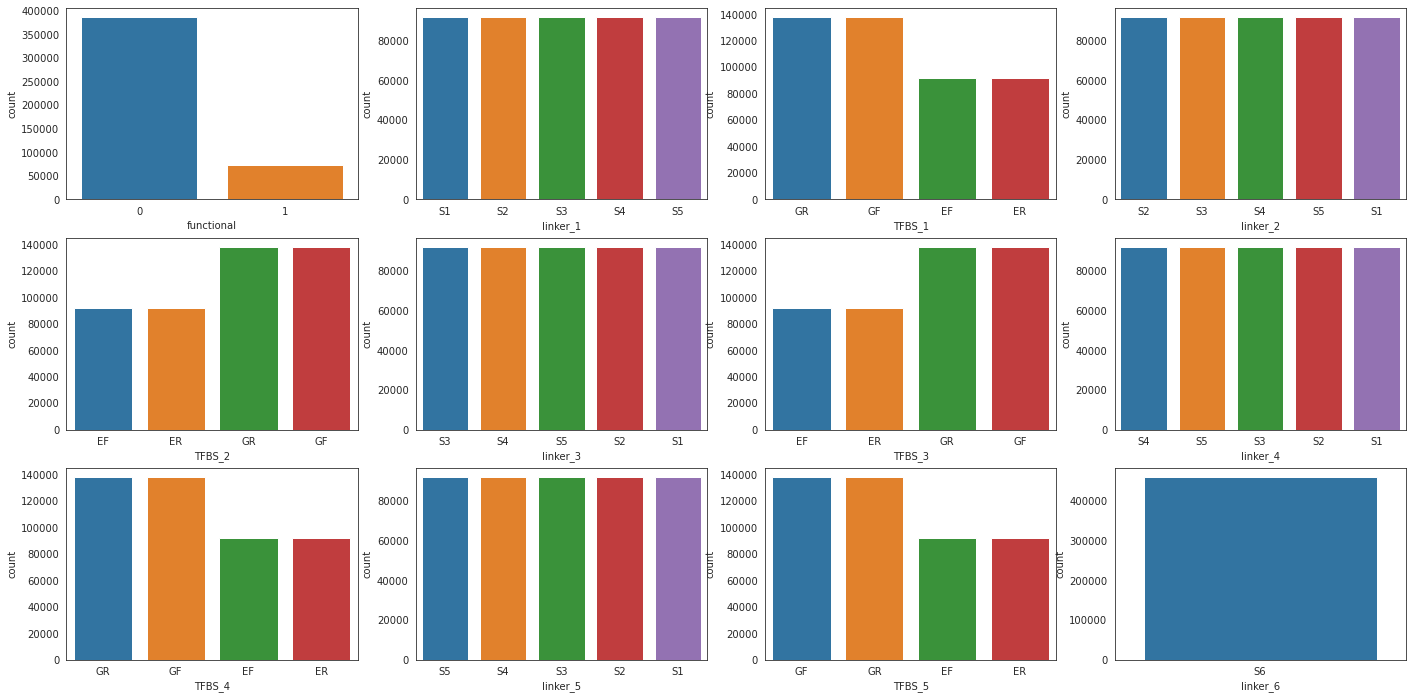

In [802]:
# Plot the number of each feature in each block as countplots with seaborn
num_rows, num_cols = 3, 4
fig, ax = plt.subplots(3, 4, figsize=(24, 12))
index = 0
for col in OLS_data.columns:
    if col not in ["sequence", "name"]:
        row_num = int(index / num_cols)
        col_num = index % num_cols
        sns.countplot(data=OLS_data_collapsed, x=col, ax=ax[row_num][col_num])
        index += 1

In [803]:
OLS_data = OLS_data_collapsed

# Preprocess and save different feature set ideas

## Labels and identifiers

In [4]:
OLS_data = OLS_data[~OLS_data["MPRA_FXN"].isna()]

**Labels**: 0 (non-functional) and 1 (functional). These are all the same

In [5]:
y = OLS_data["MPRA_FXN"].values

In [7]:
y.shape  # Should be 302936 with 2021_07_28 table

(302936,)

In [8]:
# np.savetxt("../data/2021_OLS_Library/y_binary_0.18-0.4.txt", X=y, fmt="%d")

**Identifiers**: L1-TFBS1-... Also all the same

In [9]:
ID = OLS_data["NAME"].values

In [10]:
# np.savetxt("../data/2021_OLS_Library/sequence_id_0.18-0.4.txt", X=ID, fmt="%s")

## **<u>Sequence feature idea 1 </u>**: One hot encoding block features
 - linker_{1-5} could be a one hot encoded vector of length 6 that can be any of L1-L5 --> e.g., [0, 1, 0, 0, 0] encodes S2
 - TFBS_{1-5} could be a one hot encoded vector of length 10 that can be G{1-3}R, G{1-3}F, E{1,2}F, E{1,2}R
 - **Note**: L6 is only S6

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder(sparse=False)
X = OLS_data[block_features]
ohe.fit(X)

OneHotEncoder(sparse=False)

In [18]:
X_ohe = ohe.fit_transform(X)

**Q** How many features should we be expecting?
 - Each non-L6 linker has 5 options and there are 5 of these --> 5\*5=25
 - Each TFBS has 10 options and there are 5 of these --> 10\*5=25
 - L6 has one option S6 --> 1
 - Should have:

In [19]:
print("Expecting %d features" % ((5 * 5) + (10 * 5) + 1))
print("Observed %d features" % X_ohe.shape[1])
if (5 * 5) + (10 * 5) + 1 != X_ohe.shape[1]:
    print("Something is amiss...")

Expecting 76 features
Observed 76 features


In [20]:
# Remove the last feature as it doesn't vary at all
X_ohe = X_ohe[:, :-1]

In [21]:
print("Expecting %d features" % ((5 * 5) + (10 * 5)))
print("Observed %d features" % X_ohe.shape[1])
if (5 * 5) + (10 * 5) != X_ohe.shape[1]:
    print("Something is amiss...")

Expecting 75 features
Observed 75 features


In [22]:
# Save the different files as plain text for now
np.savetxt(
    "../data/2021_OLS_Library/X_ohe_0.18-0.4.txt", X=X_ohe, fmt="%d", delimiter=" "
)

## **<u>Sequence feature idea 2 </u>**: Mixed encoding 1.0
 - Replace binding sites using dictionary
 - Separate based on these binding sites and add create "dummy variables"
 - Get lengths of linkers around binding sites

In [11]:
siteName2bindingSiteSequence = {
    "S1": "CATCTGAAGCTC",
    "G1R": "GTTATCTC",
    "S2": "TA",
    "E1F": "ACGGAAGT",
    "S3": "TTTCGAA",
    "E2F": "AAGGAAAT",
    "S4": "TGCTC",
    "G2R": "AATATCT",
    "S5": "",
    "G3F": "AAGATAGG",
    "G1F": "GAGATAAC",
    "E1R": "ACTTCCGT",
    "E2R": "ATTTCCTT",
    "G2F": "AGATATT",
    "G3R": "CCTATCTT",
    "S6": "A",
}

In [12]:
bindingSiteName2affinities = {
    "G1": 0.9,
    "G2": 0.3,
    "G3": 0.5,
    "E1": 0.6,
    "E2": 0.4,
}

In [42]:
import tqdm

In [44]:
smart_encoding = []
# Loop through each enhancer
for i, (row_num, enh_data) in tqdm.tqdm(enumerate(OLS_data[block_features].iterrows())):

    enh_enc = []  # Single enhancer encoding

    # Loop through each position
    for col_num in range(len(enh_data.index)):

        # If we have a spacer in the current position we need to check for surrounding GATA-3 sites
        if "S" in enh_data.iloc[col_num]:

            # If the spacer is the empty spacer, just add a 0 and go to the next
            if enh_data.iloc[col_num] == "S5":
                enh_enc.append(
                    len(siteName2bindingSiteSequence[enh_data.iloc[col_num]])
                )
                continue

            # If the spacer is downstream of a GATA-2 reverse, we need to add a nucleotide to the GATA-2 (subtract one from spacer)
            if col_num > 0:
                if enh_data.iloc[col_num - 1] == "G2R":
                    enh_enc.append(
                        len(siteName2bindingSiteSequence[enh_data.iloc[col_num]]) - 1
                    )
                    continue

            # If the spacer is upstream of a GATA-2 forward, we need to add a nucleotide to the GATA-2 (subtract one from spacer)
            if col_num < len(enh_data.index) - 1:
                if enh_data.iloc[col_num + 1] == "G2F":
                    enh_enc.append(
                        len(siteName2bindingSiteSequence[enh_data.iloc[col_num]]) - 1
                    )
                    continue

            # Finally if no G2F or S5 is involved, just add the normal len of the spacer
            enh_enc.append(len(siteName2bindingSiteSequence[enh_data.iloc[col_num]]))
            continue

        # If we are at a TFBS, add the TFBS type, orientation and affinity
        else:
            tfbs = enh_data.iloc[col_num]
            tf = tfbs[0]
            aff = bindingSiteName2affinities[tfbs[:2]]
            orient = tfbs[2]
            enh_enc += [tf, orient, aff]
    # Poisin pill
    if row_num == 10000:
        break
    smart_encoding.append(enh_enc)

302936it [02:06, 2395.35it/s]


In [45]:
header = [
    "L1_length",
    "TFBS1_type",
    "TFBS1_orient",
    "TFBS1_affinity",
    "L2_length",
    "TFBS2_type",
    "TFBS2_orient",
    "TFBS2_affinity",
    "L3_length",
    "TFBS3_type",
    "TFBS3_orient",
    "TFBS3_affinity",
    "L4_length",
    "TFBS4_type",
    "TFBS4_orient",
    "TFBS4_affinity",
    "L5_length",
    "TFBS5_type",
    "TFBS5_orient",
    "TFBS5_affinity",
    "L6_length",
]

In [46]:
X_smart = (
    pd.DataFrame(smart_encoding, columns=header)
    .replace({"G": 0, "E": 1, "R": 0, "F": 1})
    .values
)

In [48]:
np.savetxt("../data/2021_OLS_Library/X_smart_0.18-0.4.txt", X=X_smart, fmt="%f")

## **<u>Sequence feature idea 3 </u>**: Use the actual sequence (one-hot encoded)
 - One hot encoded sequence: each position is encoded as a 1-D vector of size 4 e.g., AT is [[1,0,0,0], [0,0,0,1]]
 - Generally, we will get inputs of size (len(seq) X 4). The above example would be of size 2x4
 - Can also save the string seqs in case those are also useful down the line

**Q** Are all sequences the same length

In [10]:
OLS_data["SEQUENCE"].apply(len).value_counts()

66    302936
Name: SEQUENCE, dtype: int64

**Answer**: Yes, 66bp long

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tqdm import tqdm

In [12]:
X_seqs = OLS_data["SEQUENCE"].values

In [13]:
# Define encoders
integer_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(
    categories=[np.array([0, 1, 2, 3])], handle_unknown="ignore"
)

In [14]:
# Example steps for one hot encoding
test = X_seqs[0]
print("{}...".format(test[:5]))
integer_encoded = integer_encoder.fit_transform(list(test))
print("{}...".format(integer_encoded[:5]))
integer_encoded = np.array(integer_encoded).reshape(-1, 1)
one_hot_encoder.fit(integer_encoded)  # convert to one hot
one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
print("{}...".format(one_hot_encoded.toarray()[:5]))

CATCT...
[1 0 3 1 3]...
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]...


**One hot encoding of sequences...<u>takes about 5 minutes</u>**

In [15]:
# Applying above for all seqs
X_features = []  # will hold one hot encoded sequence
for i, seq in enumerate(tqdm(X_seqs)):
    integer_encoded = integer_encoder.fit_transform(list(seq))  # convert to integer
    integer_encoded = np.array(integer_encoded).reshape(-1, 1)
    one_hot_encoder.fit(integer_encoded)  # convert to one hot
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    X_features.append(one_hot_encoded.toarray())

100%|██████████| 302936/302936 [04:09<00:00, 1215.51it/s]


In [16]:
# Check to make sure it is correct length
len(X_features)

302936

In [17]:
X_ohe_seq = np.array(X_features)

In [18]:
# Sanity check encoding for randomly chosens sequences
indeces = np.random.choice(len(X_features), size=len(X_features) // 100)
for j, ind in enumerate(indeces):
    seq = X_seqs[ind]
    one_hot_seq = X_features[ind]
    for i, bp in enumerate(seq):
        if bp == "A":
            if (one_hot_seq[i] != [1.0, 0.0, 0.0, 0.0]).all():
                print("You one hot encoded wrong dummy!")
                print(seq, one_hot_seq)
        elif bp == "C":
            if (one_hot_seq[i] != [0.0, 1.0, 0.0, 0.0]).all():
                print("You one hot encoded wrong dummy!")
                print(seq, one_hot_seq)
        elif bp == "G":
            if (one_hot_seq[i] != [0.0, 0.0, 1.0, 0.0]).all():
                print("You one hot encoded wrong dummy!")
                print(seq, one_hot_seq)
        elif bp == "T":
            if (one_hot_seq[i] != [0.0, 0.0, 0.0, 1.0]).all():
                print("You one hot encoded wrong dummy!")
                print(seq, one_hot_seq)
        elif bp == "N":
            if (one_hot_seq[i] != [0.0, 0.0, 0.0, 0.0]).all():
                print("You one hot encoded wrong dummy!")
                print(seq, one_hot_seq)
        else:
            print(bp)
    print("Seq #{} encoded correctly".format(j + 1))

Seq #1 encoded correctly
Seq #2 encoded correctly
Seq #3 encoded correctly
Seq #4 encoded correctly
Seq #5 encoded correctly
Seq #6 encoded correctly
Seq #7 encoded correctly
Seq #8 encoded correctly
Seq #9 encoded correctly
Seq #10 encoded correctly
Seq #11 encoded correctly
Seq #12 encoded correctly
Seq #13 encoded correctly
Seq #14 encoded correctly
Seq #15 encoded correctly
Seq #16 encoded correctly
Seq #17 encoded correctly
Seq #18 encoded correctly
Seq #19 encoded correctly
Seq #20 encoded correctly
Seq #21 encoded correctly
Seq #22 encoded correctly
Seq #23 encoded correctly
Seq #24 encoded correctly
Seq #25 encoded correctly
Seq #26 encoded correctly
Seq #27 encoded correctly
Seq #28 encoded correctly
Seq #29 encoded correctly
Seq #30 encoded correctly
Seq #31 encoded correctly
Seq #32 encoded correctly
Seq #33 encoded correctly
Seq #34 encoded correctly
Seq #35 encoded correctly
Seq #36 encoded correctly
Seq #37 encoded correctly
Seq #38 encoded correctly
Seq #39 encoded corre

In [20]:
# Save in binary format
np.save("../data/2021_OLS_Library/X_seq_ohe_0.18-0.4", X_ohe_seq)

In [22]:
np.savetxt("../data/2021_OLS_Library/X_seqs_0.18-0.4.txt", X=X_seqs, fmt="%s")

## **<u>Sequence feature idea 4 </u>**: Better "mixed" encoding (mixed 2.0)
 - Replace binding sites using dictionary
 - 4 bit vector for each binding site [ets_affinity ets_orientation gata_affinity gata_orientation] - ties together the identity to affinity
 - Get lengths of linkers around binding sites
 - Corrected for having S5 linker neighbor GATA2 (need to adjust linker down or upstream from S5)

In [231]:
siteName2bindingSiteSequence = {
    "S1": "CATCTGAAGCTC",
    "G1R": "GTTATCTC",
    "S2": "TA",
    "E1F": "ACGGAAGT",
    "S3": "TTTCGAA",
    "E2F": "AAGGAAAT",
    "S4": "TGCTC",
    "G2R": "AATATCT",
    "S5": "",
    "G3F": "AAGATAGG",
    "G1F": "GAGATAAC",
    "E1R": "ACTTCCGT",
    "E2R": "ATTTCCTT",
    "G2F": "AGATATT",
    "G3R": "CCTATCTT",
    "S6": "A",
}

In [232]:
bindingSiteName2affinities = {
    "G1": 0.9,
    "G2": 0.3,
    "G3": 0.5,
    "E1": 0.6,
    "E2": 0.4,
}

In [233]:
smart_encoding = []
# Loop through each enhancer
for i, (row_num, enh_data) in tqdm.tqdm(enumerate(OLS_data[block_features].iterrows())):

    enh_enc = []  # Single enhancer encoding

    # Loop through each position
    for col_num in range(len(enh_data.index)):

        # If we have a spacer in the current position we need to check for surrounding GATA-2 sites
        if "S" in enh_data.iloc[col_num]:

            # If the spacer is the empty spacer, just add a 0 and go to the next
            if enh_data.iloc[col_num] == "S5":
                enh_enc.append(
                    len(siteName2bindingSiteSequence[enh_data.iloc[col_num]])
                )
                continue

            # If the spacer is downstream of a GATA-2 reverse, we need to add a nucleotide to the GATA-2 (subtract one from spacer)
            if col_num > 0:
                if enh_data.iloc[col_num - 1] == "G2R":
                    enh_enc.append(
                        len(siteName2bindingSiteSequence[enh_data.iloc[col_num]]) - 1
                    )
                    continue

            # If the spacer is upstream of a GATA-2 forward, we need to add a nucleotide to the GATA-2 (subtract one from spacer)
            if col_num < len(enh_data.index) - 1:
                if enh_data.iloc[col_num + 1] == "G2F":
                    enh_enc.append(
                        len(siteName2bindingSiteSequence[enh_data.iloc[col_num]]) - 1
                    )
                    continue

            # Finally if no G2 or S5 is involved, just add the normal len of the spacer
            enh_enc.append(len(siteName2bindingSiteSequence[enh_data.iloc[col_num]]))
            continue

        # If we are at a TFBS, add the TFBS type, orientation and affinity
        else:
            tfbs = enh_data.iloc[col_num]
            tf = tfbs[0]
            aff = bindingSiteName2affinities[tfbs[:2]]
            orient = tfbs[2]
            if tf == "E":
                enh_enc += [aff, orient, 0, 0]
            elif tf == "G":
                enh_enc += [0, 0, aff, orient]
    # Poisin pill
    # if row_num == 10000:
    #    break
    smart_encoding.append(enh_enc + ["-".join(list(enh_data.values))])

302936it [02:07, 2378.90it/s]


In [235]:
header = [
    "L1_length",
    "TFBS1_ETS_affinity",
    "TFBS1_ETS_orient",
    "TFBS1_GATA_affinity",
    "TFBS1_GATA_orient",
    "L2_length",
    "TFBS2_ETS_affinity",
    "TFBS2_ETS_orient",
    "TFBS2_GATA_affinity",
    "TFBS2_GATA_orient",
    "L3_length",
    "TFBS3_ETS_affinity",
    "TFBS3_ETS_orient",
    "TFBS3_GATA_affinity",
    "TFBS3_GATA_orient",
    "L4_length",
    "TFBS4_ETS_affinity",
    "TFBS4_ETS_orient",
    "TFBS4_GATA_affinity",
    "TFBS4_GATA_orient",
    "L5_length",
    "TFBS5_ETS_affinity",
    "TFBS5_ETS_orient",
    "TFBS5_GATA_affinity",
    "TFBS5_GATA_orient",
    "L6_length",
    "Enhancer",
]

In [236]:
X_mixed2_df = pd.DataFrame(smart_encoding, columns=header).replace({"R": -1, "F": 1})

In [237]:
X_mixed2_df["Enhancer"].str.contains("S5-G2F").sum(), X_mixed2_df[
    "Enhancer"
].str.contains("G2R-S5").sum()

(29952, 23969)

In [238]:
def correct_s5(x):
    enhancer = x["Enhancer"]
    if "S5-G2F" in enhancer:
        s5_loc = int((np.where(np.array(enhancer.split("-")) == "S5")[0][0] / 2) + 1)
        if s5_loc == 1:
            return x
        linker_to_change_loc = s5_loc - 1
        x["L{}_length".format(linker_to_change_loc)] -= 1
        return x
    elif "G2R-S5" in enhancer:
        s5_loc = int((np.where(np.array(enhancer.split("-")) == "S5")[0][0] / 2) + 1)
        if s5_loc == 6:
            return x
        linker_to_change_loc = s5_loc + 1
        x["L{}_length".format(linker_to_change_loc)] -= 1
        return x
    else:
        return x

In [239]:
X_mixed2_df_corrected = X_mixed2_df.apply(correct_s5, axis=1)

In [241]:
X_mixed2_df_corrected[
    (X_mixed2_df_corrected["L1_length"] == 11)
    & (X_mixed2_df_corrected["TFBS1_GATA_affinity"] != 0.3)
]["L2_length"].value_counts()

0    1437
Name: L2_length, dtype: int64

In [242]:
X_mixed2_df_corrected[
    (X_mixed2_df_corrected["L6_length"] == 0)
    & (X_mixed2_df_corrected["TFBS5_GATA_affinity"] != 0.3)
]["L5_length"].value_counts()

0    6037
Name: L5_length, dtype: int64

In [245]:
X_mixed2_df_corrected = X_mixed2_df_corrected.drop("Enhancer", axis=1).values

In [246]:
np.savetxt("mixed_2.0//X_mixed_2.0_0.18-0.4.txt", X=X_mixed2_df_corrected, fmt="%f")

# Scratch

## Old mixed encoding 1.0 code

In [226]:
j = 0
for i, (row_num, enh_data) in tqdm.tqdm(enumerate(X_mixed2_df.iterrows())):
    enhancer = enh_data["Enhancer"]
    if "S5-G2F" in enhancer:
        s5_loc = int((np.where(np.array(enhancer.split("-")) == "S5")[0][0] / 2) + 1)
        if s5_loc == 1:
            continue
        linker_to_change_loc = s5_loc - 1
        # print(i, row_num, enhancer, s5_loc, linker_to_change_loc, enh_data["L{}_length".format(linker_to_change_loc)])
        enh_data["L{}_length".format(linker_to_change_loc)] -= 1
        # print(i, row_num, enhancer, s5_loc, linker_to_change_loc, enh_data["L{}_length".format(linker_to_change_loc)])
        j += 1
    elif "G2R-S5" in enhancer:
        s5_loc = int((np.where(np.array(enhancer.split("-")) == "S5")[0][0] / 2) + 1)
        if s5_loc == 6:
            continue
        linker_to_change_loc = s5_loc + 1
        # print(i, row_num, enhancer, s5_loc, linker_to_change_loc, enh_data["L{}_length".format(linker_to_change_loc)])
        enh_data["L{}_length".format(linker_to_change_loc)] -= 1
        # print(i, row_num, enhancer, s5_loc, linker_to_change_loc, enh_data["L{}_length".format(linker_to_change_loc)])
        j += 1
    # if j==100:
    #    break

2400it [00:00, 7178.25it/s]


## Different thresholds and methods for dealing with class imbalance

**Dealing with class imbalance**

In [37]:
from sklearn.utils import resample

In [39]:
pos_mask = y_train == 1

In [42]:
neg_y = y_train[~pos_mask]
pos_y = y_train[pos_mask]

neg_X = X_train[~pos_mask, :]
pos_X = X_train[pos_mask, :]

In [43]:
print(np.unique(pos_y, return_counts=True))
print(np.unique(neg_y, return_counts=True))

(array([1]), array([65561]))
(array([0]), array([349159]))


**Downsample negative class**

In [86]:
downsampled_neg_X, downsampled_neg_y = resample(
    neg_X, neg_y, n_samples=len(pos_y), random_state=13
)

In [87]:
X_train_down = np.concatenate([downsampled_neg_X, pos_X])
y_train_down = np.concatenate([downsampled_neg_y, pos_y])

In [88]:
X_train_down.shape, y_train_down.shape

((131122, 75), (131122,))

In [89]:
np.unique(y_train_down, return_counts=True)[1] / len(y_train_down)

array([0.5, 0.5])